In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("UberDataset.csv")

In [11]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# 1.In which category do people book the most Uber Rides?
# 2.For which purposes do people book Uber rides the most?
# 3. At what time the people book the cab the most from uber?
# 4. In which months do people book uber rides less frequently?
# 5. On which day of the week people do book the most?
# 6. How many miles people usually book a cab through uber?

In [12]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [14]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Data Pre-processing

In [17]:
#Replacing the missing values of purpose 
df['PURPOSE'].fillna("Not_Given",inplace = True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_5180\1684142392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("Not_Given",inplace = True)


In [18]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not_Given
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [28]:
#Changing the data type of start_date,end_date ( object ===> datetime)
df['START_DATE'] = pd.to_datetime(df["START_DATE"], errors ="coerce")
df['END_DATE']   = pd.to_datetime(df["END_DATE"], errors = "coerce")

In [61]:
#Creating a separate column of Date and time from START_DATE coloumn of dataset
from datetime import datetime
df["Date"] = pd.DatetimeIndex(df['START_DATE']).date
df["Time"] = pd.DatetimeIndex(df['START_DATE']).hour

In [62]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Given,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [63]:
# Now we will make a separate category column based on the Time coloumn 
#EXample for 12:00 am to 10:00 am = Morning , 10:00 am to 15:00 pm = Afternoon, 15:00 pm to 19:00 pm = Evening
df["day_night"] = pd.cut(x=df['Time'], bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])

In [64]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Given,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [65]:
#Now we are dropping Null value from the dateset
df.dropna(inplace = True)

# Data Visualization

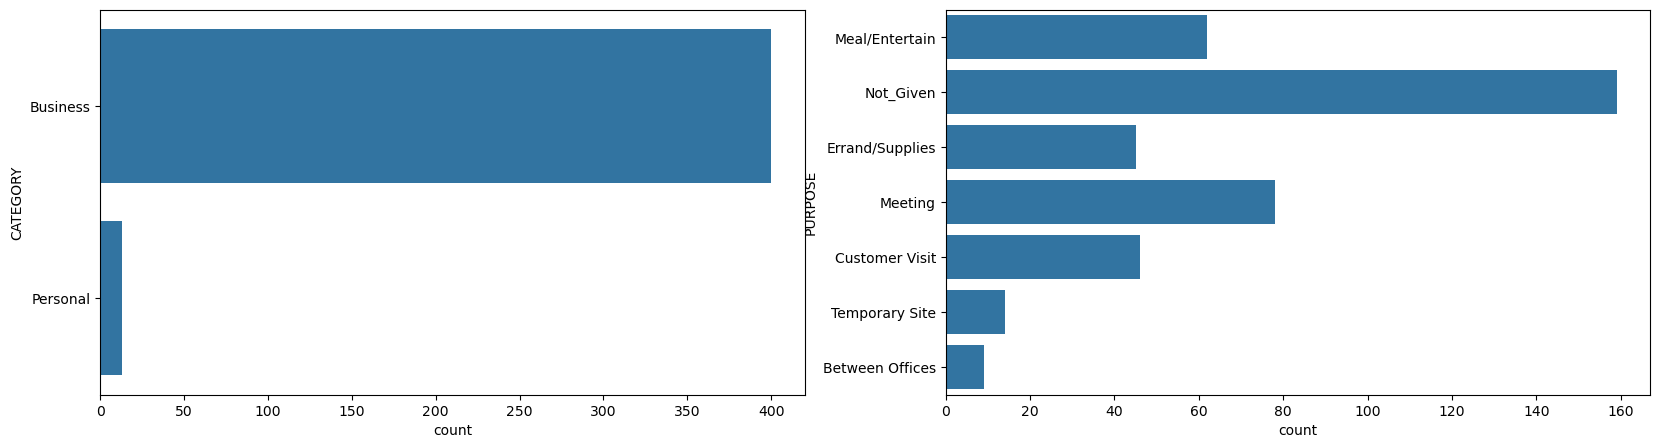

In [66]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.show()

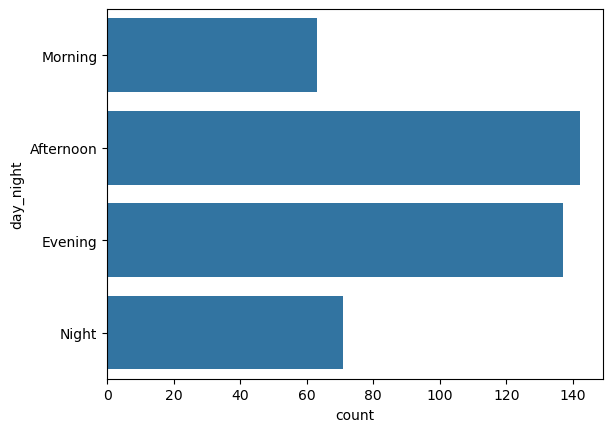

In [69]:
sns.countplot(df['day_night'])
plt.show()

In [71]:
#Now extracting a month from START_DATE
df["Month"] = pd.DatetimeIndex(df["START_DATE"]).month
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day_night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Given,2016-01-02,1,Morning,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,1


In [73]:
# Now creating a dictionary to convert month column into srting
# example = if 1 is there in month column then it show Janaury

month_name = { 1.0: 'Jan',2.0:'Feb', 3.0: 'Mar', 4.0: 'April', 5.0:'May', 6.0:'June',
               7.0:'July',8.0:'Aug', 9.0: 'Sept',10.0: 'Oct',  11.0:'Nov',12.0:'Dec'}

df['Month']= df.Month.map(month_name)

In [78]:
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day_night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Given,2016-01-02,1,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan


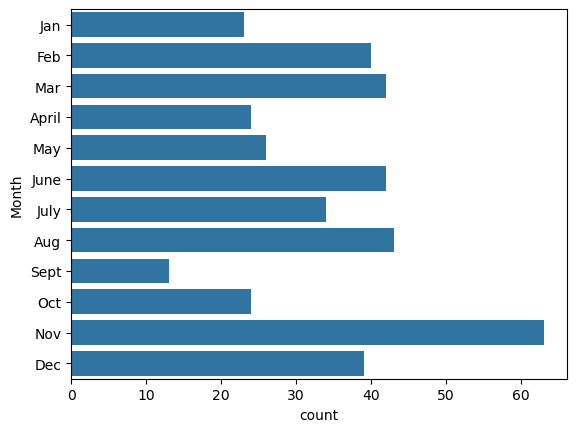

In [79]:
sns.countplot(df['Month'])
plt.show()

In [93]:
#Creating new column of Day
df['Day'] = pd.DatetimeIndex(df["START_DATE"]).day

day_name = { 0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6 :'Sun'}

df['Day'] = df['Day'].map(day_name)

In [94]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day_night,Month,Week,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,1,Tues
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Given,2016-01-02,1,Morning,Jan,2,Wed
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,2,Wed
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan,5,Sat
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan,6,Sun


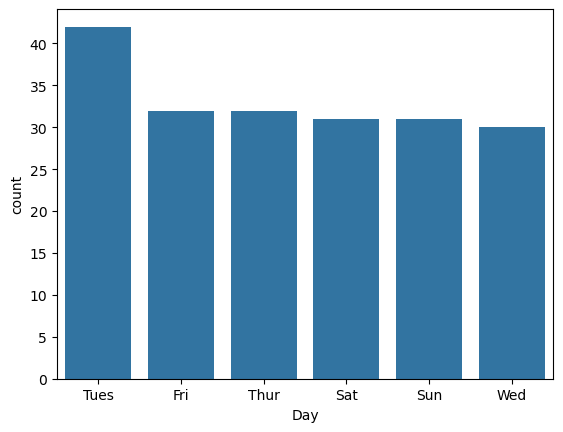

In [95]:
day_name = df.Day.value_counts()
sns.barplot(x=day_name.index,y=day_name)
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_5180\1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

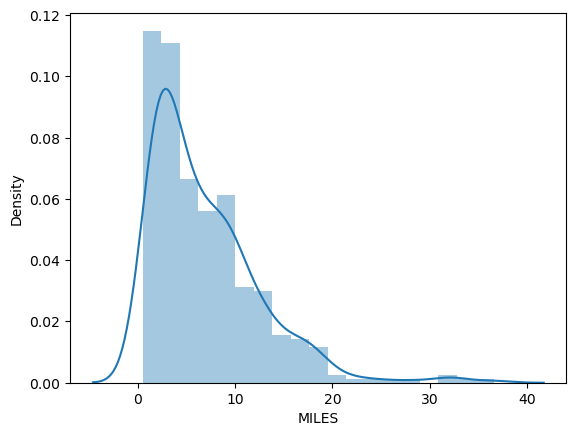

In [98]:
sns.distplot(df[df['MILES']<40]['MILES'])